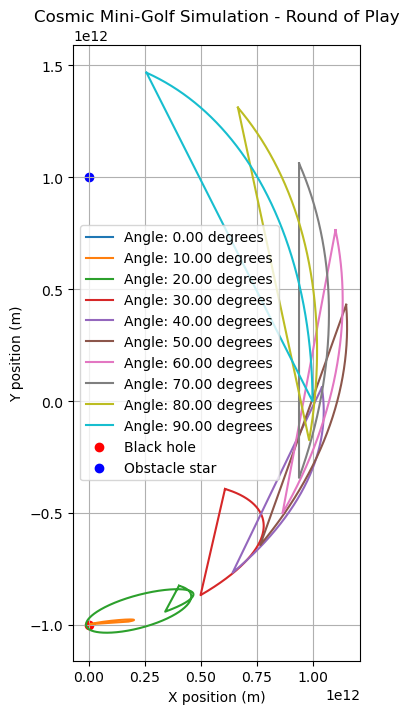

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
m_star = 2e30  # Mass of the obstacle star (kg)
m_hole = 2e30  # Mass of the target black hole (kg)
distance = 2e12  # Distance between star and hole (m)
v0 = 15000  # Initial speed of the planet (m/s)

# Function to calculate gravitational force
def gravitational_force(position):
    r_star = np.linalg.norm(position - np.array([0, distance/2]))  # Distance to the star
    r_hole = np.linalg.norm(position - np.array([0, -distance/2]))  # Distance to the hole
    epsilon = 1e-6  # Small value to avoid division by zero
    force_star = -G * m_star * m_hole * (position - np.array([0, distance/2])) / (r_star + epsilon)**3  # Force due to the star
    force_hole = -G * m_star * m_hole * (position - np.array([0, -distance/2])) / (r_hole + epsilon)**3  # Force due to the hole
    total_force = force_star + force_hole  # Total force
    return total_force

# Function to simulate the motion of the planet
def simulate_motion(position, velocity, dt, steps):
    positions = [position]
    for _ in range(steps):
        force = gravitational_force(position)
        acceleration = force / m_hole
        velocity += acceleration * dt
        position += velocity * dt
        positions.append(position.copy())
        if np.linalg.norm(position - np.array([0, -distance/2])) < 1e10:
            break  # Stop simulation if the planet falls into the black hole
    return np.array(positions)

# Function to play a round of cosmic mini-golf
def play_round(theta):
    initial_position = np.array([distance/2 * np.sin(theta), -distance/2 * np.cos(theta)])  # Starting position of the planet
    initial_velocity = np.array([v0 * np.cos(theta), v0 * np.sin(theta)])  # Initial velocity of the planet

    dt = 1000  # Time step (s)
    steps = 100000  # Number of steps

    planet_positions = simulate_motion(initial_position, initial_velocity, dt, steps)

    return planet_positions

# Play the round with different angles
angles = np.linspace(0, np.pi/2, 10)  # Range of angles (0 to pi/2)
plt.figure(figsize=(10, 8))
for angle in angles:
    planet_positions = play_round(angle)
    plt.plot(planet_positions[:, 0], planet_positions[:, 1], label=f'Angle: {np.degrees(angle):.2f} degrees')

plt.scatter([0], [-distance/2], color='red', label='Black hole')
plt.scatter([0], [distance/2], color='blue', label='Obstacle star')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.title('Cosmic Mini-Golf Simulation - Round of Play')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid(True)
plt.show()
